In [1]:
!pip install yfinance


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import yfinance as yf
stock= yf.download("AMZN", start="2014-10-15", end="2024-10-15")

[*********************100%***********************]  1 of 1 completed


In [4]:
stock.head

<bound method NDFrame.head of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-10-15   15.217500   15.395000   14.955000   15.298500   15.298500   
2014-10-16   14.691500   15.341000   14.691500   15.143000   15.143000   
2014-10-17   15.357500   15.460000   15.136000   15.182000   15.182000   
2014-10-20   15.147500   15.326500   15.101000   15.310500   15.310500   
2014-10-21   15.495000   15.782000   15.353500   15.766500   15.766500   
...                ...         ...         ...         ...         ...   
2024-10-08  181.919998  183.089996  180.919998  182.720001  182.720001   
2024-10-09  182.820007  185.850006  182.050003  185.169998  185.169998   
2024-10-10  187.130005  188.130005  185.830002  186.649994  186.649994   
2024-10-11  186.630005  189.929993  186.300003  188.820007  188.820007   
2024-10-14  189.779999  189.830002  187.360001  187.539993  187.539993   

       

In [5]:
stock.shape

(2516, 6)

In [6]:
stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,97.126900,98.231128,95.916503,97.097807,97.097807,7.717162e+07
std,53.191646,53.802083,52.509648,53.149997,53.149997,4.095630e+07
min,14.220000,14.521000,14.200000,14.347500,14.347500,1.762600e+07
25%,45.149249,45.462249,44.861000,45.114250,45.114250,5.155375e+07
50%,92.920002,94.099998,91.736248,93.083252,93.083252,6.618500e+07
75%,150.299999,152.005993,147.520874,149.997746,149.997746,9.070700e+07
max,200.089996,201.199997,199.050003,200.000000,200.000000,4.771220e+08


In [7]:
stock = stock.ffill()

<Axes: xlabel='Date'>

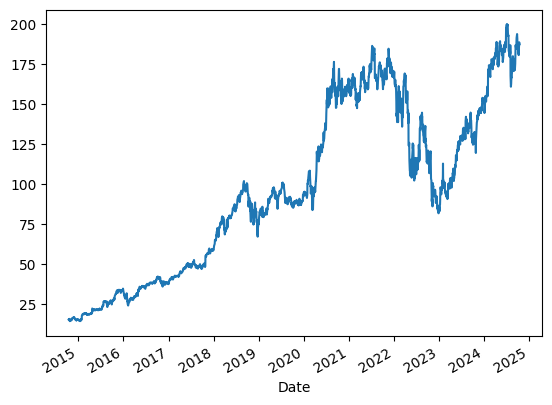

In [8]:
stock['Adj Close'].plot()

In [9]:
X=stock.drop(['Adj Close'],axis=1)
X=X.drop(['Close'],axis=1)

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from sklearn import preprocessing
from keras.layers import Conv1D,Flatten,MaxPooling1D,Bidirectional,LSTM,Dropout,TimeDistributed,MaxPool2D
from keras.layers import Dense,GlobalAveragePooling2D
import matplotlib.pyplot as plt
import os
import pprint
import tensorflow as tf

<Axes: title={'center': 'Correlation with Adj Close'}>

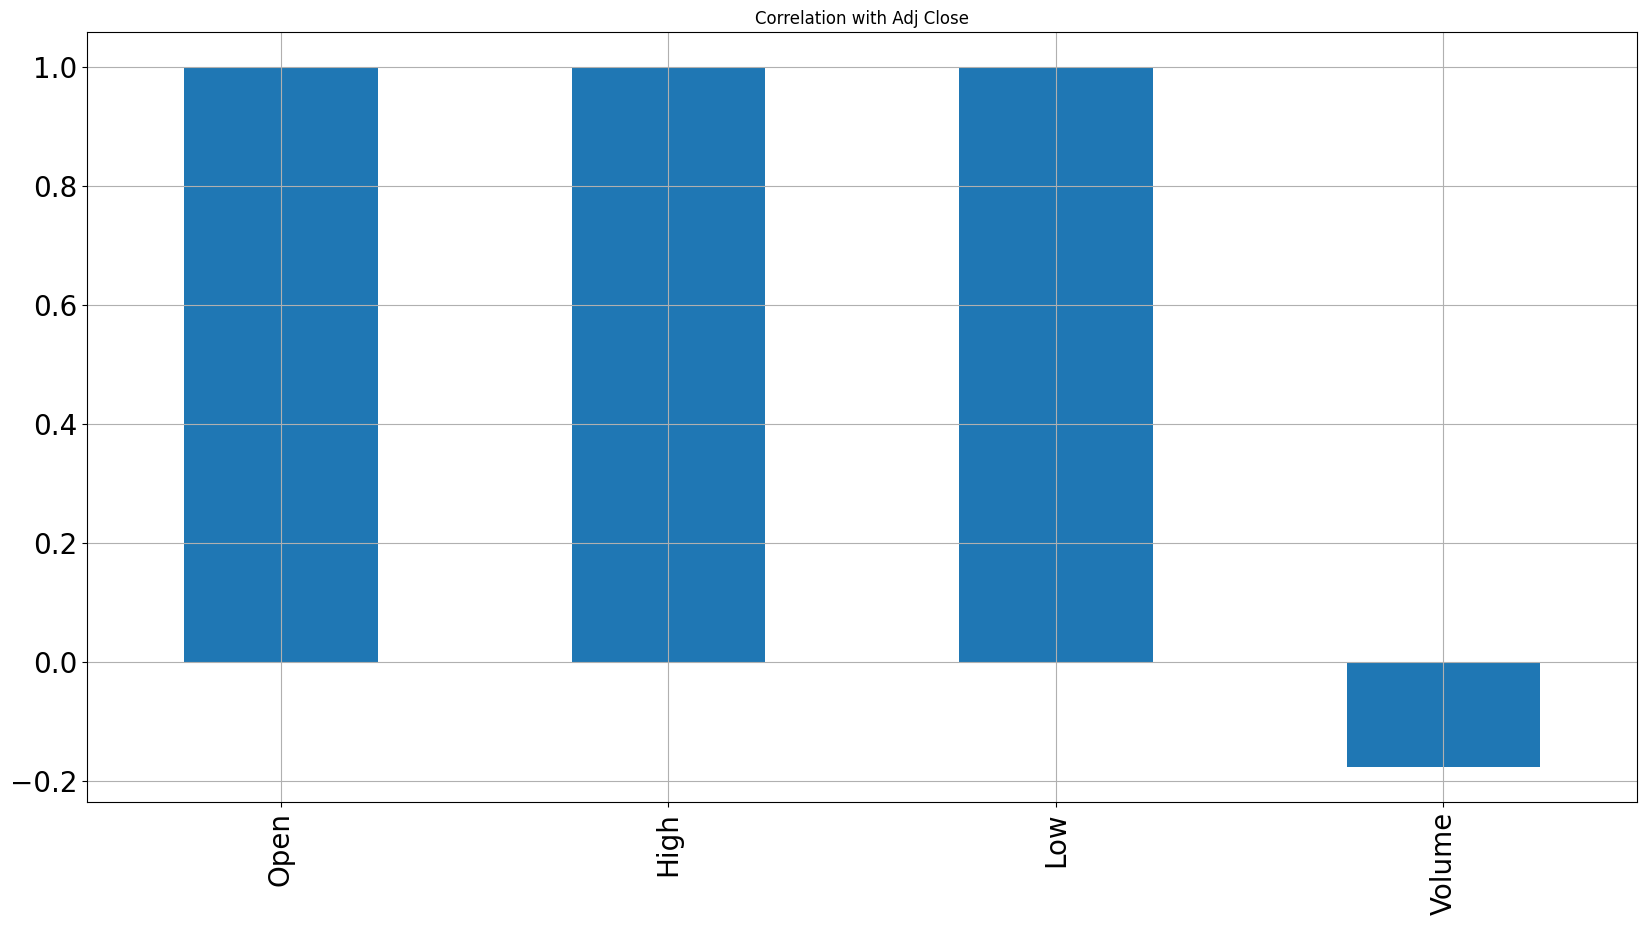

In [13]:
# Select only numeric columns from X
X_numeric = X.select_dtypes(include=[np.number])

# Compute correlation with 'Adj Close' and plot
X_numeric.corrwith(stock['Adj Close']).plot.bar(
        figsize=(20, 10), title="Correlation with Adj Close", fontsize=20,
        rot=90, grid=True)

In [14]:
test = stock
# Target column
target_adj_close = pd.DataFrame(test['Adj Close'])
display(test.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-10-15,15.2175,15.3950,14.9550,15.2985,15.2985,106878000
2014-10-16,14.6915,15.3410,14.6915,15.1430,15.1430,94626000
2014-10-17,15.3575,15.4600,15.1360,15.1820,15.1820,88102000
2014-10-20,15.1475,15.3265,15.1010,15.3105,15.3105,64690000
2014-10-21,15.4950,15.7820,15.3535,15.7665,15.7665,71186000


In [15]:
# selecting Feature Columns
feature_columns = ['Open', 'High', 'Low', 'Volume']

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,Open,High,Low,Volume
Date,,,,
2014-10-15,0.005367,0.004682,0.004084,0.194239
2014-10-16,0.002537,0.004393,0.002659,0.167575
2014-10-17,0.006120,0.005030,0.005064,0.153377
2014-10-20,0.004990,0.004315,0.004874,0.102425
2014-10-21,0.006860,0.006755,0.006240,0.116562


In [17]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,Open,High,Low,Volume
Date,,,,
2014-10-15,0.005367,0.004682,0.004084,0.194239
2014-10-16,0.002537,0.004393,0.002659,0.167575
2014-10-17,0.006120,0.005030,0.005064,0.153377
2014-10-20,0.004990,0.004315,0.004874,0.102425
2014-10-21,0.006860,0.006755,0.006240,0.116562


Shape of features :  (2516, 4)
Shape of target :  (2516, 1)


,Open,High,Low,Volume
Date,,,,
2024-10-07,0.907785,0.905721,0.898296,0.053838
2024-10-08,0.902244,0.902989,0.901920,0.019034
2024-10-09,0.907086,0.917773,0.908034,0.018971
2024-10-10,0.930274,0.929987,0.928483,0.022109
2024-10-11,0.927584,0.939629,0.931025,0.017684


,Adj Close
Date,
2024-10-07,182.720001
2024-10-08,185.169998
2024-10-09,186.649994
2024-10-10,188.820007
2024-10-11,187.539993



 -----After process------ 

Shape of features :  (2426, 4)
Shape of target :  (2426, 1)


,Adj Close
Date,
2024-05-30,176.440002
2024-05-31,178.339996
2024-06-03,179.339996
2024-06-04,181.279999
2024-06-05,185.000000


In [18]:
window_size = 50
week = 7
X = []
Y = []

for i in range(0 , len(stock) - window_size -1 , 1):
    first = stock.iloc[i, 4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((stock.iloc[i + j, 4] - first) / first)
    # for j in range(week):
    temp2.append((stock.iloc[i +window_size, 4] - first) / first)
    # X.append(np.array(stock.iloc[i:i+window_size,4]).reshape(50,1))
    # Y.append(np.array(stock.iloc[i+window_size,4]).reshape(1,1))
    # print(stock2.iloc[i:i+window_size,4])
    X.append(np.array(temp).reshape(50, 1))
    Y.append(np.array(temp2).reshape(1,1))

In [19]:
train_X,test_X,train_label,test_label = train_test_split(X, Y, test_size=0.1,shuffle=False)
len_t = len(train_X)
# train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_label, test_size=0.2,shuffle=True)

print(len(train_X))
print(len(test_X))
train_X = np.array(train_X)
test_X = np.array(test_X)
train_label = np.array(train_label)
test_label = np.array(test_label)
# valid_label = np.array(valid_label)
# valid_X = np.array(valid_X)
train_X = train_X.reshape(train_X.shape[0],1,50,1)
test_X = test_X.reshape(test_X.shape[0],1,50,1)

2218
247


In [20]:
# Model setup
model = Sequential()
model.add(TimeDistributed(Conv1D(128, kernel_size=1, activation='relu', input_shape=(None, 50, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(256, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(512, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
model.add(Dropout(0.25))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='RMSprop', loss='mse')

# Train the model
model.fit(train_X, train_label, validation_data=(test_X, test_label), epochs=40, batch_size=64, shuffle=False)

# Evaluate the model
print("\n----- Model Evaluation -----")
test_loss = model.evaluate(test_X, test_label)
print(f"Test Loss (MSE): {test_loss}")

Epoch 1/40


C:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0145 - val_loss: 0.0049
Epoch 2/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0050 - val_loss: 0.0037
Epoch 3/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0038 - val_loss: 0.0028
Epoch 4/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0032 - val_loss: 0.0023
Epoch 5/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0028 - val_loss: 0.0024
Epoch 6/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 7/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 8/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 9/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 10/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 11/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 12/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0025 - val_l

In [21]:
# Predictions
predicted = model.predict(test_X)
test_label = test_label[:, 0]
predicted = predicted[:, 0]

# Calculate RMSE and R2 Score
rmse = np.sqrt(mean_squared_error(test_label, predicted))
r2 = r2_score(test_label, predicted)
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
RMSE: 0.041260007860533486
R² Score: 0.7843373804352956


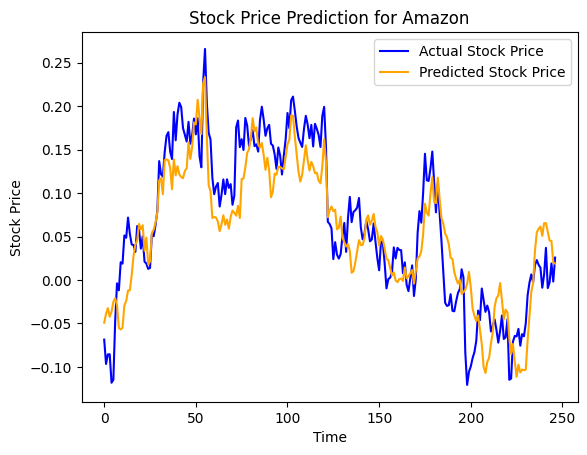

In [22]:
# Plotting results
plt.plot(test_label, color='blue', label='Actual Stock Price')
plt.plot(predicted, color='orange', label='Predicted Stock Price')
plt.title('Stock Price Prediction for Amazon')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

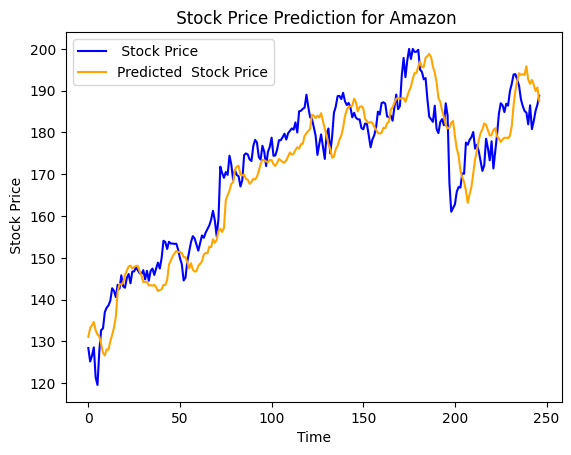

In [23]:
for j in range(len_t , len_t + len(test_X)):
    temp =stock.iloc[j,4]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(test_label, color = 'blue', label = ' Stock Price')
plt.plot(predicted, color = 'orange', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction for Amazon')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [24]:
col1 = pd.DataFrame(test_label, columns=['True'])

col2 = pd.DataFrame(predicted, columns=['CNN_prediction'])

results = pd.concat([col1, col2], axis=1)
results.to_excel('Predicted_CNN.xlsx')